In [132]:
import pandas as pd

# CSV 파일 불러오기
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# 데이터 확인
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 설정
plt.rc('font', family='AppleGothic')  # Mac 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [134]:
print("\n 데이터 정보:")
print(train.info())


 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [135]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [136]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [137]:
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [138]:
# 대출 승인과 거절 그룹별 대출 금액의 평균
train.groupby('Loan_Status')['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

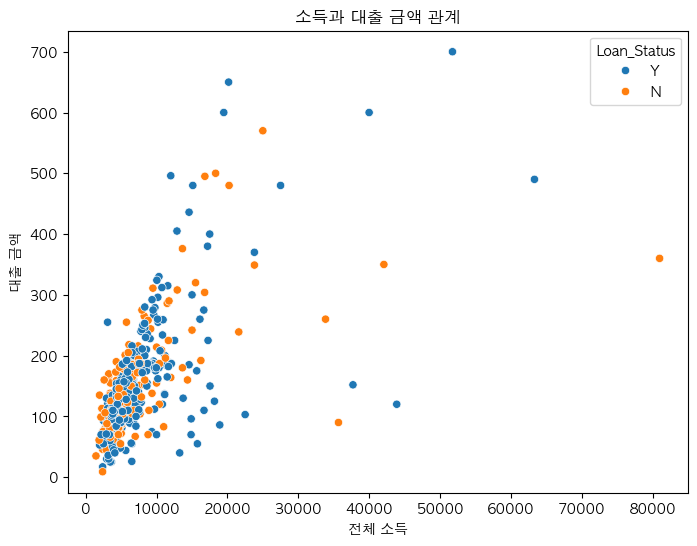

In [139]:
# 소득과 대출 금액의 관계 확인하기
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# 소득과 대출 금액의 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['TotalIncome'], y=train['LoanAmount'], hue=train['Loan_Status'])
plt.xlabel("전체 소득")
plt.ylabel("대출 금액")
plt.title("소득과 대출 금액 관계")
plt.show()

In [140]:
# 신용 기록이 있는 사람 vs 없는 사람의 대출 승인율
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)


Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: proportion, dtype: float64

In [141]:
# 대출 금액이 많을수록, 대출금액이 더 큰 것으로 보아, 대출 금액으로 승인 가능성을 봐야할 것 같고, 
# 신용 이력과도 관계가 확실히 보인다는 것을 알 수 있음.

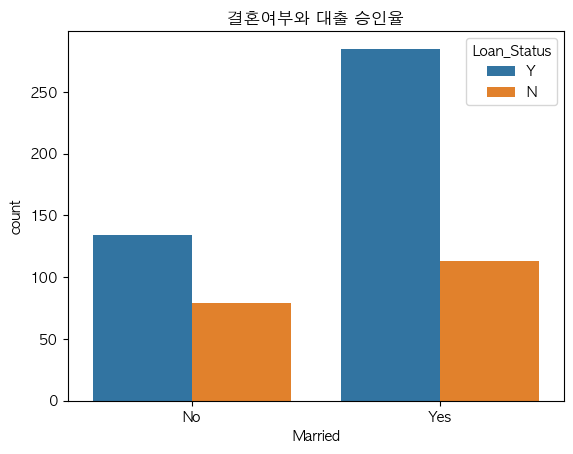

In [142]:
# 결혼여부와 대출 승인율 
sns.countplot(x="Married", hue="Loan_Status", data=train)
plt.title("결혼여부와 대출 승인율")
plt.show()

In [143]:
#결혼 한 경우에 더 대출시도를 많이 한다는 것..? 그리고 승인율도 거부율에 비해 많아 보임

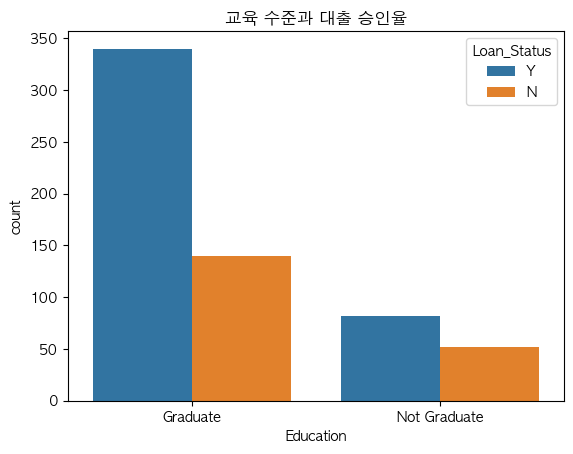

In [144]:
# 교육 수준과 대출 승인율 
sns.countplot(x="Education", hue="Loan_Status", data=train)
plt.title("교육 수준과 대출 승인율")
plt.show()


In [145]:
# 교육을 해야 학력이 있을수록 대출 승인을 더 많이 해주고, 많이 시도하는 것으로 보임.

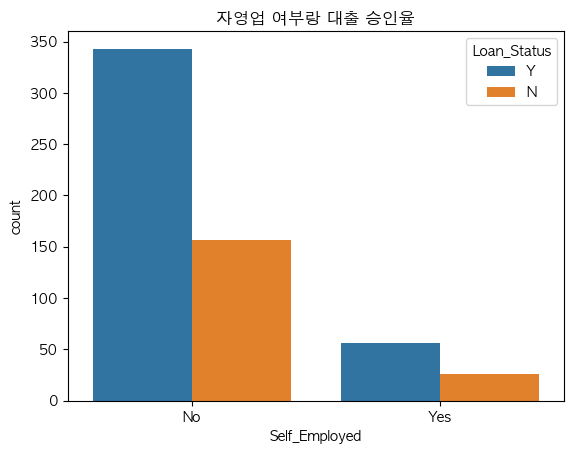

In [146]:
# 자영업 여부랑 대출 승인율
sns.countplot(x="Self_Employed", hue="Loan_Status", data=train)
plt.title("자영업 여부랑 대출 승인율")
plt.show()


In [147]:
# 자영업자가 아닌 사람들이 대출을 더 많이 함.. 
# (근데 직업은 많으니까 그거에 대한 상관성보다.. 일단 대출을 더 많이 해주는 것을 알 수 있는 것으로 볼 수 있을듯!

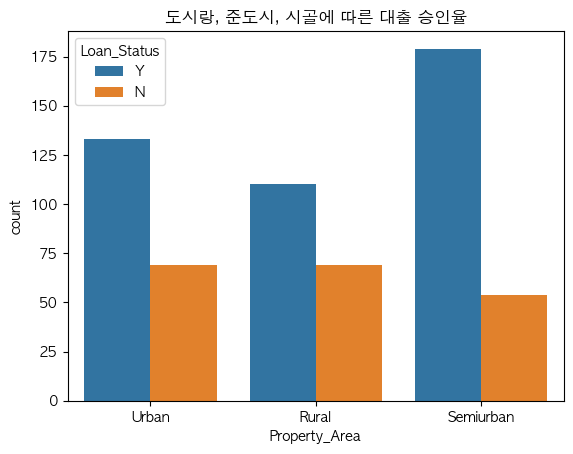

In [148]:
# 부동산 지역이랑 대출 승인율 
sns.countplot(x="Property_Area", hue="Loan_Status", data=train)
plt.title("도시랑, 준도시, 시골에 따른 대출 승인율")
plt.show()


In [149]:
# 고차원데이터가 많아보여.. SVM 모델링? 괜찮아 보일듯.. 합니다...

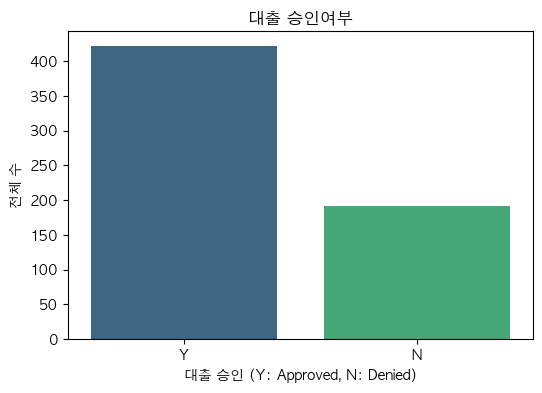

In [150]:
# 대출 승인여부 시각화
plt.figure(figsize=(6,4))
sns.countplot(x=train['Loan_Status'], hue=train['Loan_Status'], palette='viridis', legend=False)
plt.title("대출 승인여부")
plt.xlabel("대출 승인 (Y: Approved, N: Denied)")
plt.ylabel("전체 수")
plt.show()

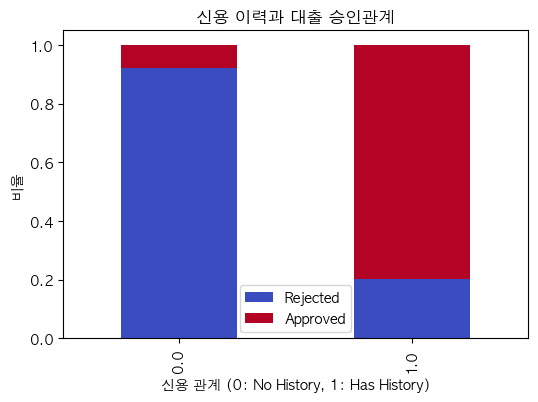

In [151]:
# 신용 이력과 대출 승인관계
ct = pd.crosstab(train['Credit_History'], train['Loan_Status'], normalize='index')

ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
plt.title("신용 이력과 대출 승인관계")
plt.xlabel("신용 관계 (0: No History, 1: Has History)")
plt.ylabel("비율")
plt.legend(["Rejected", "Approved"])
plt.show()


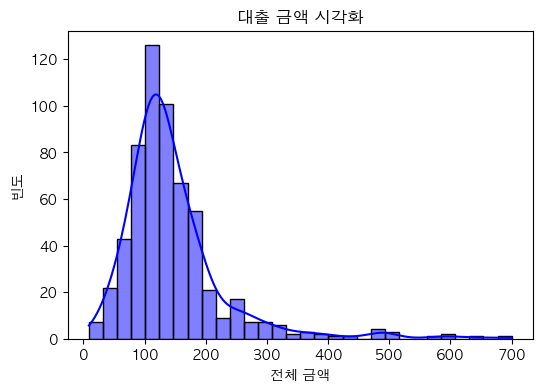

In [152]:
# 대출 금액 분포
plt.figure(figsize=(6,4))
sns.histplot(train['LoanAmount'], bins=30, kde=True, color="blue")
plt.title("대출 금액 시각화")
plt.xlabel("전체 금액")
plt.ylabel("빈도")
plt.show()

In [153]:
# 결측치 값 보기

In [154]:
# 결측치 비율 확인, 결측치 있는 컬럼만
missing_data = train.isnull().sum() / len(train) * 100
missing_data = missing_data[missing_data > 0] 
print(missing_data)


Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64


In [155]:
# 분포랑 값 비교하기
for column in train.columns:
    if train[column].isnull().sum() > 0:
        print(f"Column: {column}")
        print(train[column].value_counts(dropna=False)) 
        print('-' * 50)


Column: Gender
Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64
--------------------------------------------------
Column: Married
Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64
--------------------------------------------------
Column: Dependents
Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64
--------------------------------------------------
Column: Self_Employed
Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64
--------------------------------------------------
Column: LoanAmount
LoanAmount
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 204, dtype: int64
--------------------------------------------------
Column: Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0  

In [156]:
#Gender는 최빈값으로 채우기..? 
#Married도 최빈값,? 값이 3개, 13개 밖에 안되다보니까, 최빈값으로 하는 것도 괜찮아 보임

In [157]:
# Self_Employed는 32개 이긴한데,, 최빈값으로 채우기보다는 이거와 상관관계가 높은 
# 변수가 있다면 그걸로 채우는 것도 괜찮아보임.
# 수치형 변수는 그러면 어떻게 할까.. 중앙값? 
# 대출 상환이력도 50개면 무시하기엔 너무 애매한 숫자인데, 다 0으로 막 채우기에는 애매함.. 
# 팀원들이랑 상의 필요해보임.

In [158]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64


In [187]:
# Loan_Status 그룹화해서 Credit_History 결측치 채우기
credit_history_mean_by_status = train.groupby('Loan_Status')['Credit_History'].transform('mean')
train['Credit_History'] = train['Credit_History'].fillna(credit_history_mean_by_status)

print(train.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64


In [191]:
# LoanAmount 그룹화하여 Gender, Married, Dependents 결측치 채우기 
for col in ['Gender', 'Married', 'Dependents','Self_Employed']:
    mode_by_loan_amount = train.groupby('LoanAmount')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else x)
    train[col] = train[col].fillna(mode_by_loan_amount)

print(train.isnull().sum())


Loan_ID               0
Gender                4
Married               1
Dependents            2
Education             0
Self_Employed         6
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64


In [193]:
# 남은 결측치들 다 제거 
train.dropna(inplace=True)

print(train.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64


In [195]:
# 가설1 : '성별(Gender)과 대출승인여부(Loan_Status)는 관련이 있을 것이다.'

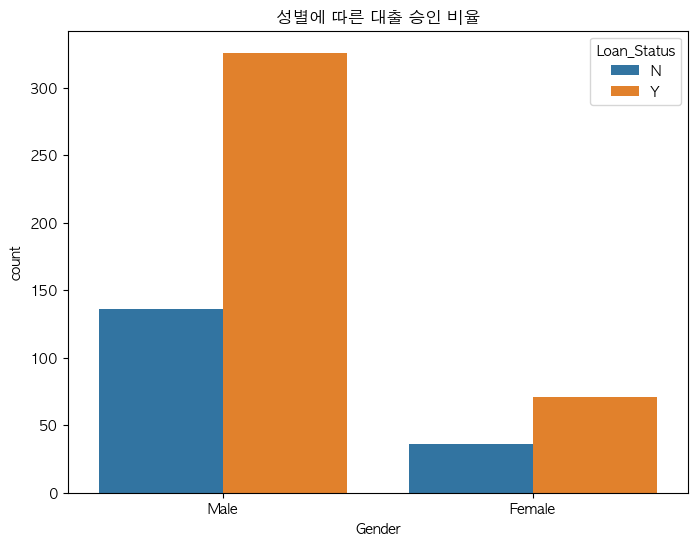

In [197]:
# 성별에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Loan_Status', data=train)
plt.title('성별에 따른 대출 승인 비율')
plt.show()


In [215]:
# 성별과 대출 승인 여부에 따른 비율 계산
gender_loan_status = train.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
gender_loan_status = gender_loan_status.T  # 행과 열 바꾸기
gender_loan_status_percentage = gender_loan_status * 100  # 퍼센트로 변환

print(gender_loan_status_percentage)


Gender         Female       Male
Loan_Status                     
N            33.64486  29.437229
Y            66.35514  70.562771


In [217]:
# 해석 : 남성 대출 승인 비율이 더 높다. 성별에 따른 차이가 있긴 하지만 크게 차이가 있지는 않다.

In [219]:
# 인사이트 도출 : 성별이 대출 승인의 중요한 변수일 수 있지만, 그 차이가 크지 않음으로 보아 성별만으로 대출 승인을 
# 예측하기 어렵다는 결론. 성별 외 다른 변수들이 더 함께 고려해야함으로 보임.

In [199]:
# 가설2 : '결혼 여부(Married)와 대출승인여부(Loan_status)와는 관련이 있을것이다'

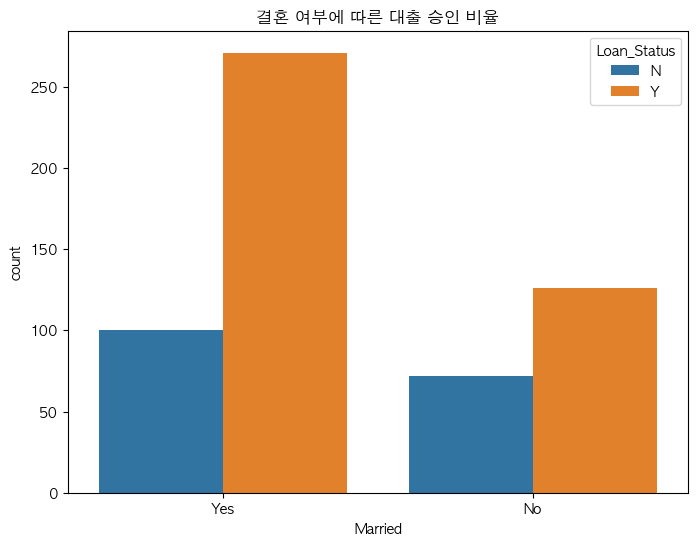

In [225]:
# 결혼 여부에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.countplot(x='Married', hue='Loan_Status', data=train)
plt.title('결혼 여부에 따른 대출 승인 비율')
plt.show()


In [227]:
# 결혼 상태별 대출 승인율과 거부율 계산
married_loan_status_percentage = train.groupby('Married')['Loan_Status'].value_counts(normalize=True).unstack() * 100
print(married_loan_status_percentage)


Loan_Status          N          Y
Married                          
No           36.363636  63.636364
Yes          26.954178  73.045822


In [229]:
# 결과 해석
# 기혼자가 대출 승인율이 더 높음. 기혼자가 대출을 승인받을 가능성이 더 높다는 것을 시사함.
# 미혼자의 대출 거부 비율이 더 높음. 

In [233]:
#기혼자(Yes)의 대출 승인 비율: 73.05%
#미혼자(No)의 대출 승인 비율: 63.64%

#차이 = 기혼자의 대출 승인 비율 - 미혼자의 대출 승인 비율
#차이 = 73.05% - 63.64% = 9.41%

In [231]:
# 인사이트 도출
# 결혼 상태가 대출 승인에 영향을 미침. 결혼 여부가 대출 승인의 중요한 역할을 하고 있음. 
# 기혼자는 대출 승인을 받을 확률이 미혼자보다 약 9.41% 더 높음. 

In [279]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#plt.rc('font', family='Malgun Gothic')  # 윈도우
plt.rc('font', family='AppleGothic')  # 맥
# plt.rc('font', family='NanumGothic')  # 리눅스

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [287]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


In [285]:
import matplotlib.pyplot as plt
import matplotlib as mpl

print(mpl.rcParams['font.family'])  # 현재 사용 중인 폰트 확인


['sans-serif']


In [203]:
#가설3 : '신용 이력(Credit_History)와 대출승인여부(Loan_status)와 관련이 있을것이다.'

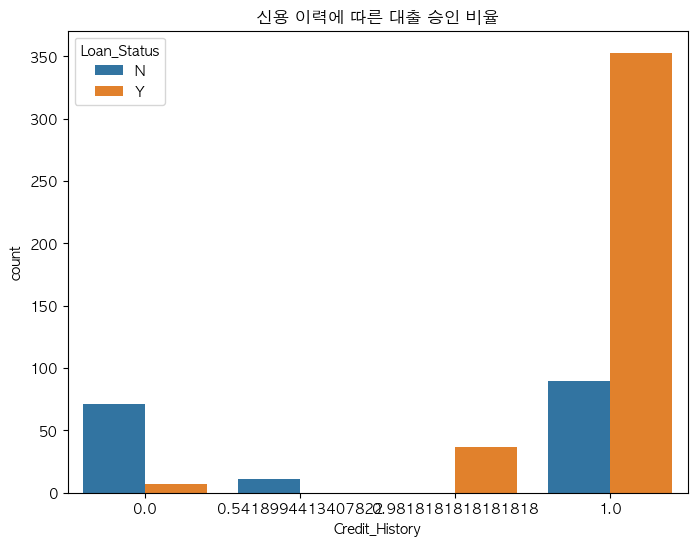

In [235]:
# 신용 이력에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)
plt.title('신용 이력에 따른 대출 승인 비율')
plt.show()


In [237]:
credit_history_1 = train[train['Credit_History'] == 1]
credit_history_0 = train[train['Credit_History'] == 0]

# 대출 승인 비율 계산 수치화
credit_history_1_approval_rate = credit_history_1['Loan_Status'].value_counts(normalize=True)['Y'] * 100
credit_history_0_approval_rate = credit_history_0['Loan_Status'].value_counts(normalize=True)['Y'] * 100

print(f"신용 이력 있는 사람의 대출 승인 비율: {credit_history_1_approval_rate:.2f}%")
print(f"신용 이력 없는 사람의 대출 승인 비율: {credit_history_0_approval_rate:.2f}%")


신용 이력 있는 사람의 대출 승인 비율: 79.68%
신용 이력 없는 사람의 대출 승인 비율: 8.97%


In [241]:
# 결과 해석
# 신용 이력 있는 사람의 대출 승인 비율이 79.68%로 매우 높은 반면에,
# 신용 이력이 없는 사람의 대출 승인 비율은 8.97%로 매우 낮음.

# 79.68-8.97 = 70.71%

In [243]:
# 인사이트 도출
# 신용 이력의 중요성을 파악할 수 있음. 신용 이력이 있는 사람들은 대출 승인이 될 확률이 매우 높음. 
# 신용 이력이 있는 사람들이 신용 이력이 없는 사람들보다 약 70% 수치가 더 높은 것을 보아 대출 승인 여부를 
# 파악하는데 신용이력은 중요한 변수임을 알 수 있음.

# 한계 : 결측치 50개 값을 Loan_Status에 대한 결측치로 그룹화하여 값을 수정하였기에 
# 일부 조작되었을 가능성을 무시하면 안될 것 같아 보임.

In [245]:
#가설4 : '대출 금액(LoanAmount)와 대출 승인여부(Loan_Status)와 관련이 있을 것이다.'

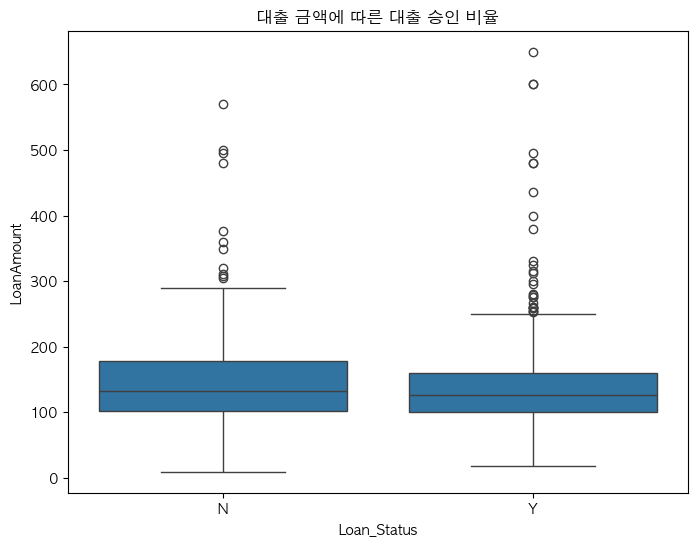

In [209]:
# 대출 금액에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train)
plt.title('대출 금액에 따른 대출 승인 비율')
plt.show()


In [253]:
# 대출 금액을 구간으로 나누기 (10개로 분류)
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'], bins=bins, labels=labels, right=False)

# 각 구간별 대출 승인 비율 계산
loan_amount_group = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
loan_amount_group['Approval_Rate'] = loan_amount_group['Y'] * 100

# 결과 출력
print(loan_amount_group[['Approval_Rate']])


Loan_Status     Approval_Rate
LoanAmount_Bin               
0-100               69.696970
100-200             71.508380
200-300             64.814815
300-400             46.153846
400-500             71.428571
500-600              0.000000
600-700            100.000000
700-800              0.000000
800-900              0.000000
900-1000             0.000000


/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/2012161973.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_group = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)


In [255]:
# 결과 해석 
# 소액 대출(0~200) : 승인 비율이 높고, 대출 금액이 커질수록 승인 비율이 떨어지는 경향을 보임. 
# (600~700) 구간 : 100% 승인 비율은 보이긴함. 좀 수상함
# 일반적으로 500~1000 구간으로 넘어갈 때 대출 승인가능성이 낮아짐. 

In [257]:
# 대출 금액을 구간으로 나누기 (10개로 분류)
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'], bins=bins, labels=labels, right=False)

# 각 구간별 대출 승인 비율 계산
loan_amount_group = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)

# 각 구간별 대출 승인/거부 케이스 수 계산
loan_amount_count = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts().unstack(fill_value=0)

# 승인 비율과 케이스 수를 결합
loan_amount_group['Approval_Rate'] = loan_amount_group['Y'] * 100
loan_amount_group['Approval_Count'] = loan_amount_count['Y']
loan_amount_group['Rejection_Count'] = loan_amount_count['N']

# 결과 출력
print(loan_amount_group[['Approval_Rate', 'Approval_Count', 'Rejection_Count']])


Loan_Status     Approval_Rate  Approval_Count  Rejection_Count
LoanAmount_Bin                                                
0-100               69.696970              92               40
100-200             71.508380             256              102
200-300             64.814815              35               19
300-400             46.153846               6                7
400-500             71.428571               5                2
500-600              0.000000               0                2
600-700            100.000000               3                0
700-800              0.000000               0                0
800-900              0.000000               0                0
900-1000             0.000000               0                0


/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/2755776325.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_group = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/2755776325.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_count = train.groupby('LoanAmount_Bin')['Loan_Status'].value_counts().unstack(fill_value=0)


In [259]:
# 결과해석2 
# 소액대출(0~200): 대출 승인의 경우가 상대적으로 높고, 200 이상부터는 승인 비율이 급격히 떨어짐. 
# 대출 금액이 높은 구간에서는 (500~1000) 대출 신청 자체도 적고, 승인 되지 않은 케이스가 더 많음.
# 500~600 은 승인이 100%인 이유는 애초에 대출 신청 자체가 3가지의 케이스 밖에 없기에 그런 결과가 뜬 것으로 확인 가능

In [261]:
# 인사이트 도출
# 소액대출은 승인 가능성이 상대적으로 높음. 약 70%
# 300~400 구간부터는 승인율이 급감함. (약 46%정도로 소액대출보다는 25%정도 하락함)
# 500 이상은 대출 승인 사례가 없음 -> 금액이 커질 수록 신청자 신용도가 낮거나 심사 기준이 강화되었음을 시사

In [211]:
# 가설5 : '소득(ApplicantIncome)과 대출승인여부관계와 관련 유무'

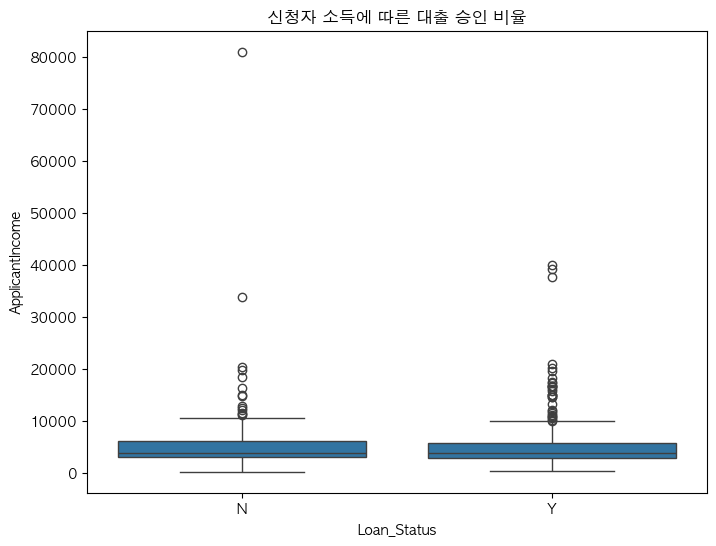

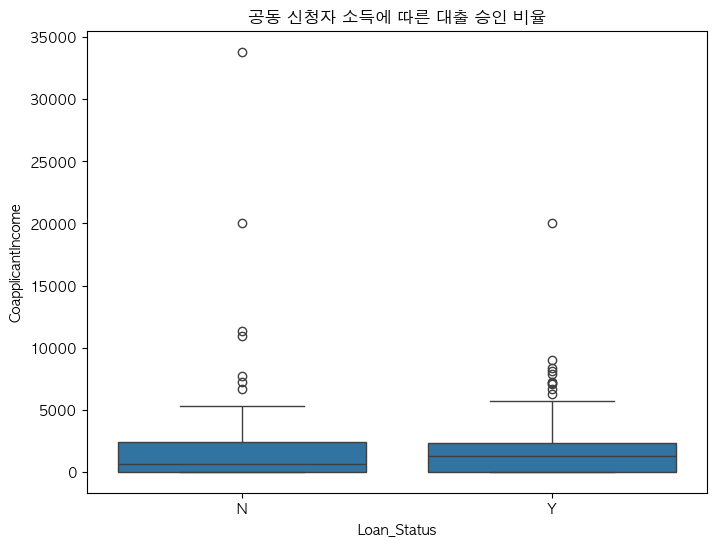

In [213]:
# 신청자 소득에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train)
plt.title('신청자 소득에 따른 대출 승인 비율')
plt.show()

# 공동 신청자 소득에 따른 대출 승인 비율
plt.figure(figsize=(8,6))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train)
plt.title('공동 신청자 소득에 따른 대출 승인 비율')
plt.show()


In [263]:
import pandas as pd

# 신청자 소득 구간 설정
income_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, train['ApplicantIncome'].max()]
income_labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K-6K', '6K-7K', '7K-8K', '8K-9K', '9K-10K', '10K+']

train['ApplicantIncome_Bin'] = pd.cut(train['ApplicantIncome'], bins=income_bins, labels=income_labels, right=False)

# 공동 신청자 소득 구간 설정
coapp_bins = [0, 1000, 2000, 3000, 4000, 5000, train['CoapplicantIncome'].max()]
coapp_labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K+']

train['CoapplicantIncome_Bin'] = pd.cut(train['CoapplicantIncome'], bins=coapp_bins, labels=coapp_labels, right=False)

# 신청자 소득별 승인율 및 승인/거부 건수 계산
app_income_group = train.groupby('ApplicantIncome_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
app_income_group['Approval_Rate'] = app_income_group['Y'] * 100
app_income_group['Approval_Count'] = train.groupby('ApplicantIncome_Bin')['Loan_Status'].apply(lambda x: (x == 'Y').sum())
app_income_group['Rejection_Count'] = train.groupby('ApplicantIncome_Bin')['Loan_Status'].apply(lambda x: (x == 'N').sum())

# 공동 신청자 소득별 승인율 및 승인/거부 건수 계산
coapp_income_group = train.groupby('CoapplicantIncome_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
coapp_income_group['Approval_Rate'] = coapp_income_group['Y'] * 100
coapp_income_group['Approval_Count'] = train.groupby('CoapplicantIncome_Bin')['Loan_Status'].apply(lambda x: (x == 'Y').sum())
coapp_income_group['Rejection_Count'] = train.groupby('CoapplicantIncome_Bin')['Loan_Status'].apply(lambda x: (x == 'N').sum())

# 결과 출력
print("신청자 소득별 승인율 및 건수")
print(app_income_group[['Approval_Rate', 'Approval_Count', 'Rejection_Count']])

print("\n공동 신청자 소득별 승인율 및 건수")
print(coapp_income_group[['Approval_Rate', 'Approval_Count', 'Rejection_Count']])


신청자 소득별 승인율 및 건수
Loan_Status          Approval_Rate  Approval_Count  Rejection_Count
ApplicantIncome_Bin                                                
0-1K                     75.000000               3                1
1K-2K                    65.625000              21               11
2K-3K                    73.387097              91               33
3K-4K                    70.270270             104               44
4K-5K                    67.073171              55               27
5K-6K                    75.510204              37               12
6K-7K                    60.526316              23               15
7K-8K                    75.000000              12                4
8K-9K                    66.666667              10                5
9K-10K                   92.307692              12                1
10K+                     61.702128              29               18

공동 신청자 소득별 승인율 및 건수
Loan_Status            Approval_Rate  Approval_Count  Rejection_Count
Coapplic

/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/3839295328.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_income_group = train.groupby('ApplicantIncome_Bin')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/3839295328.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_income_group['Approval_Count'] = train.groupby('ApplicantIncome_Bin')['Loan_Status'].apply(lambda x: (x == 'Y').sum())
/var/folders/k4/2cwjxcv173qbr_dkvpq42vdm0000gn/T/ipykernel_97131/3839295328.py:19: FutureWarning: The default of 

In [267]:
# 결론해석
# 1. 신청자 소득과 대출 승인율의 관계 
# 신청자 소득과 대출 승인율의 관계를 보면 소득이 높을수록 대출 승인율이 증가하는 경향이 있으나, 
# 6K-7K 및 10K 구간에서 승인율이 상대적으로 낮음.
# 9K-10K 구간의 승인율이 92.3%로 가장 높음 : 높은 소득 신청자의 신용도가 높아 승인 가능성이 커진것으로 보임.
# 6K-7K 구간과 10K+ 구간은 60%에서 승인율이 낮음.
# : 소득이 높음에도 불구하고 승인율이 낮다는 것은 대춞 금액이 과다하거나, 부채비율이 높아 승인 조건을 
# 충족하지 못한 사례가 포함되어 있을 가능성이 있음. 
# 중간소득 구간인 (2K-5K) 의 승인율은 67~75%로 비교적 안정적임. 

# 2. 공동 신청자 소득과 대출 승인율의 관계 
# 공동 신청자 소득이 증가할수록 승인율이 증가하는 경향이 있음. 
# 소득이 2K-3K 구간이 약 75.8%인데, 가장 높은 승인율을 보임.
# 소득이 3K-5K 구간에서는 65~69% 수준으로 낮아지는 경향이 존재하는데, 이는 대출 규모가 커짐에 따라
# 신용 요건이 더 엄격하게 적용된 결과임을 알 수 있음. 
# 0-1K 구간도 67.8%로 비교적 높은 승인율을 보임. 

In [269]:
# 인사이트 도출 (신청자 소득)
# 대출 승인율이 소득에 따라 선형적으로 증가하는 것은 아님. 
# 중위소득구간의 승인율이 비교적 균일하게 유지되며, 일부 고소득자는 부채 비율 등의 이유로 승인율이 낮아질 수 있음.
# 소득이 높은 구간에도 대출 승인율이 낮아지는 경향이 있어 추가적인 재무 요건의 분석이 필요함으로 보임.

In [271]:
# 인사이트 도출(공동신청자 소득) 
# 공동신청자가 있는 경우 승인율이 65~75%로 유지되며, 소득이 2K-3K일 때 가장 높음.
# 공동신청자 소득이 너무 높아지면 오히려 승인율이 감소하는 경향이 있으며, 이는 대출금 증가와 관련될 가능성이 있음.
# 공동 신청자 소득이 낮더라도 승인율이 크게 낮아지지는 않는 것을 보아, 단독 신청자 대비 공동신청자 효과가 존재할 가능성 있음을 시사